In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from lof import outliers

In [2]:
np.random.seed(0)

In [3]:
def display_data(fake_data, train_data):
    fake_data = pd.DataFrame(fake_data)
    fake_data.head()

    train_data = pd.DataFrame(train_data)
    train_data.head()

    fake_data["label"] = 1
    train_data["label"] = 0
    
    data = pd.concat([fake_data, train_data])
    data.head()

    sns.pairplot(data, hue='label')

In [4]:
df_1 = pd.read_csv('data/train.csv', header=None)
df_2 = pd.read_csv('data/data_val_log_return.csv', header=None)
df = pd.concat([df_1, df_2])

df = df.sample(frac=1).reset_index(drop=True)

train_data = np.array(df.drop(labels=0, axis=1))

data_dim = train_data.shape[1]

power = 4

In [5]:
X = train_data ** (1./power)
mu = np.mean(X, axis=0)
cov = np.cov(X.T)
B = np.linalg.cholesky(cov)

In [6]:
def generate_data(mu, B, power, Z):
    generated = np.abs(mu + np.dot(Z, B.T)) ** power
    return generated

In [7]:
mu_Z = np.zeros(train_data.shape[1])
cov_Z = np.eye(train_data.shape[1])
Z = np.random.multivariate_normal(mu_Z, cov_Z, train_data.shape[0])

In [8]:
generated = generate_data(mu, B, power, Z)

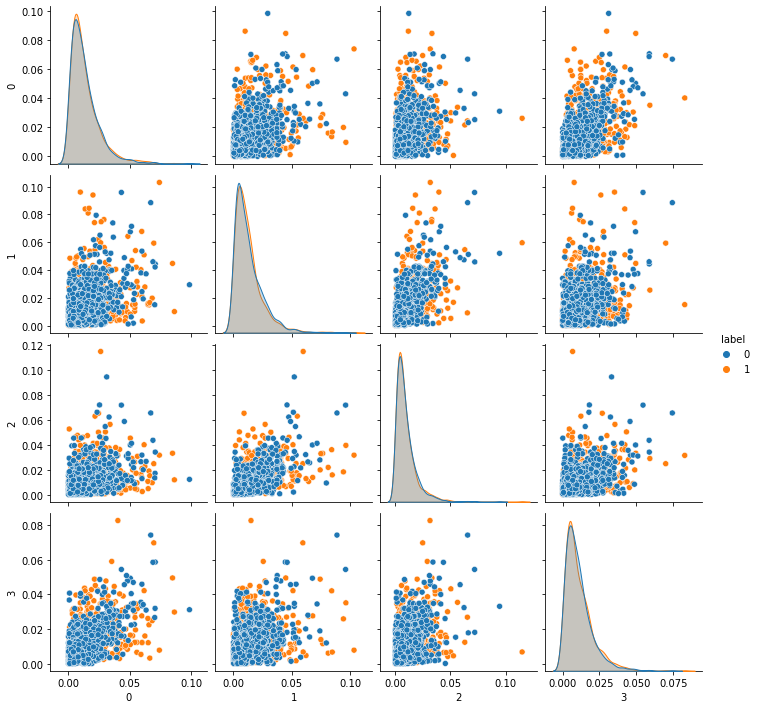

In [9]:
display_data(generated, train_data)

### With data filtering

In [10]:
tmp_data = [tuple(u) for u in train_data]
lof = outliers(5, tmp_data)

In [11]:
good_index = list(range(len(tmp_data)))
for outlier in lof:
    good_index.remove(tmp_data.index(outlier['instance']))

In [13]:
train_data = train_data[good_index]

In [14]:
X = train_data ** (1./power)
mu = np.mean(X, axis=0)
cov = np.cov(X.T)
B = np.linalg.cholesky(cov)

In [15]:
Z = np.random.multivariate_normal(mu_Z, cov_Z, train_data.shape[0])

In [16]:
generated = generate_data(mu, B, power, Z)

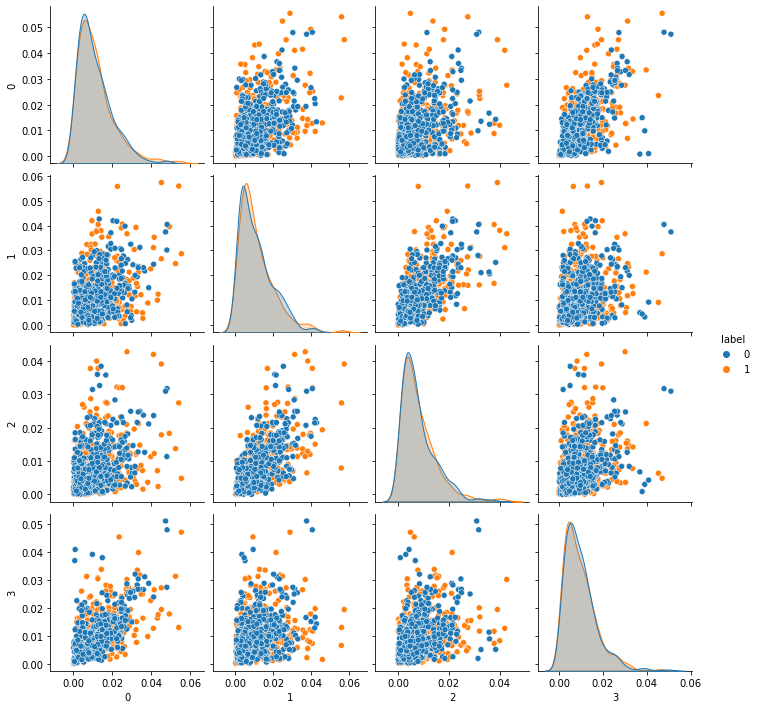

In [17]:
display_data(generated, train_data)

In [23]:
initial_train_data = np.array(df.drop(labels=0, axis=1))

In [24]:
Z_test = np.random.multivariate_normal(mu_Z, cov_Z, initial_train_data.shape[0])

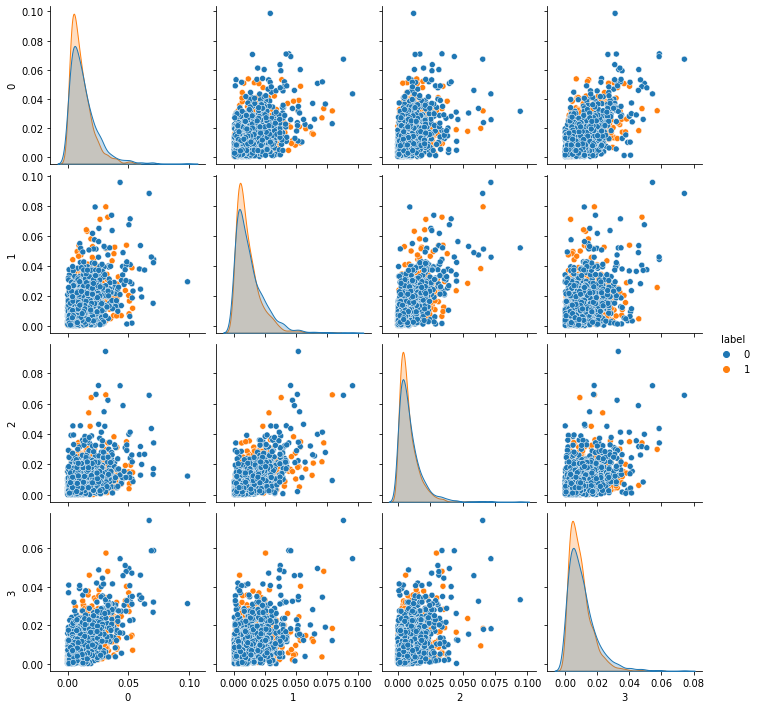

In [26]:
display_data(generate_data(mu, B, power, Z_test), initial_train_data)

### With Noise filtering

In [18]:
tmp_data = [tuple(u) for u in generated]
lof = outliers(5, tmp_data)

In [19]:
good_index = list(range(len(tmp_data)))
for outlier in lof:
    good_index.remove(tmp_data.index(outlier['instance']))  

In [20]:
new_Z = Z[good_index]
new_generated = generate_data(mu, B, power, new_Z)

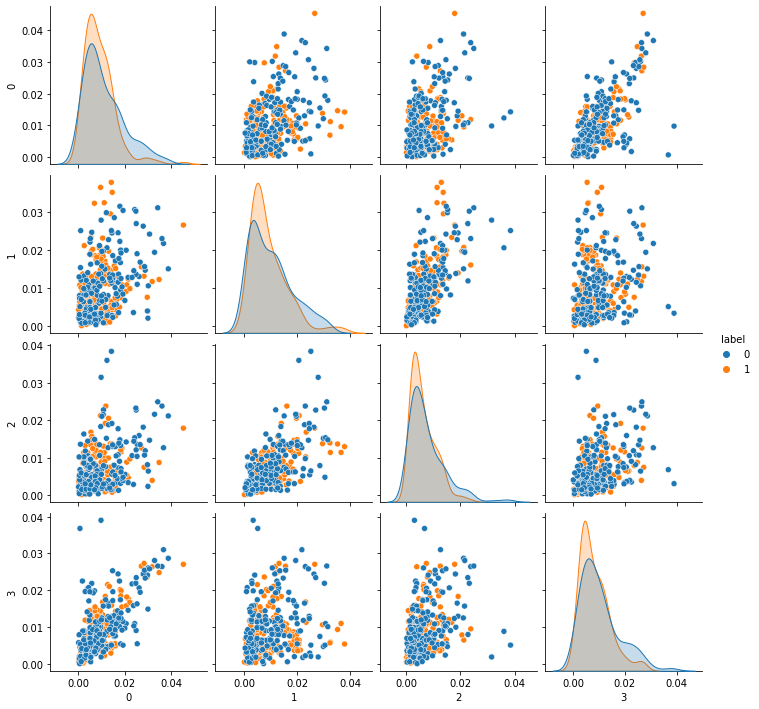

In [21]:
display_data(new_generated, train_data[:new_generated.shape[0]])